In [1]:
ls

sample_data/


In [2]:
%cd /content/drive/MyDrive/Manish Sir Project/Gait Work

/content/drive/MyDrive/Manish Sir Project/Gait Work


In [4]:
ls

'Gait Dataset'/   hariOm.ipynb


In [5]:
!pip install livelossplot

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.metrics import *

from livelossplot import PlotLossesKeras

In [10]:
path = "Gait Dataset"
angles = os.listdir(path)
angles

['126', '162', '072', '018', '054', '036', '090', '144', '000', '108', '180']

In [19]:
train_dict = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
val_dict = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
for angle in angles:
  angle_path = os.path.join(path, angle)
  
  train_path = os.path.join(angle_path, "train")
  val_path = os.path.join(angle_path, "val")
  
  train_dict[angle].append(train_path)
  val_dict[angle].append(val_path)


In [27]:
print(train_dict)
print(val_dict)
train_dict["126"][0]

{'000': ['Gait Dataset/000/train'], '018': ['Gait Dataset/018/train'], '036': ['Gait Dataset/036/train'], '054': ['Gait Dataset/054/train'], '072': ['Gait Dataset/072/train'], '090': ['Gait Dataset/090/train'], '108': ['Gait Dataset/108/train'], '126': ['Gait Dataset/126/train'], '144': ['Gait Dataset/144/train'], '162': ['Gait Dataset/162/train'], '180': ['Gait Dataset/180/train']}
{'000': ['Gait Dataset/000/val'], '018': ['Gait Dataset/018/val'], '036': ['Gait Dataset/036/val'], '054': ['Gait Dataset/054/val'], '072': ['Gait Dataset/072/val'], '090': ['Gait Dataset/090/val'], '108': ['Gait Dataset/108/val'], '126': ['Gait Dataset/126/val'], '144': ['Gait Dataset/144/val'], '162': ['Gait Dataset/162/val'], '180': ['Gait Dataset/180/val']}


'Gait Dataset/126/train'

In [23]:
train_gen = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
val_gen = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}

In [28]:
for angle in angles:
  train_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range= 0.2, shear_range= 0.2)
  val_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range= 0.2, shear_range= 0.2)
  
  print("working directory : ", angle)

  print(" For Training")
  train_gen[angle] = train_datagen.flow_from_directory(train_dict[angle][0], 
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = "categorical")
  print(" For Validating")
  val_gen[angle] = val_datagen.flow_from_directory(val_dict[angle][0], 
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = "categorical")

working directory :  126
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  162
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  072
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  018
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  054
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  036
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  090
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  144
 For Training
Found 240

In [32]:
train_gen["000"]

In [29]:
c1=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=6, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

c2=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
)

c3 = PlotLossesKeras()

Epoch 1/10
30/30 [==============================] - 5s 130ms/step - loss: 1.8116 - accuracy: 0.2598 - val_loss: 1.5246 - val_accuracy: 0.4500
Epoch 2/10
30/30 [==============================] - 3s 114ms/step - loss: 1.1873 - accuracy: 0.6818 - val_loss: 1.1631 - val_accuracy: 0.6833
Epoch 3/10
30/30 [==============================] - 3s 113ms/step - loss: 0.7767 - accuracy: 0.9085 - val_loss: 1.0291 - val_accuracy: 0.6500
Epoch 4/10
30/30 [==============================] - 3s 113ms/step - loss: 0.5270 - accuracy: 0.9657 - val_loss: 0.7856 - val_accuracy: 0.7500
Epoch 5/10
30/30 [==============================] - 3s 113ms/step - loss: 0.4377 - accuracy: 0.9727 - val_loss: 0.7297 - val_accuracy: 0.7333
Epoch 6/10
30/30 [==============================] - 3s 113ms/step - loss: 0.3299 - accuracy: 0.9963 - val_loss: 0.7147 - val_accuracy: 0.7167
Epoch 7/10
30/30 [==============================] - 3s 113ms/step - loss: 0.2590 - accuracy: 0.9976 - val_loss: 0.6120 - val_accuracy: 0.8000
Epoch 

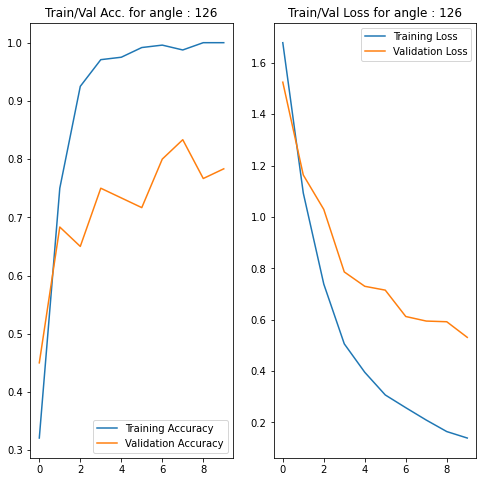

Epoch 1/10
30/30 [==============================] - 140s 5s/step - loss: 1.8832 - accuracy: 0.2722 - val_loss: 1.4686 - val_accuracy: 0.5667
Epoch 2/10
30/30 [==============================] - 3s 114ms/step - loss: 1.2126 - accuracy: 0.6942 - val_loss: 1.2455 - val_accuracy: 0.6333
Epoch 3/10
30/30 [==============================] - 3s 113ms/step - loss: 0.8915 - accuracy: 0.7826 - val_loss: 1.0341 - val_accuracy: 0.6167
Epoch 4/10
30/30 [==============================] - 3s 112ms/step - loss: 0.6451 - accuracy: 0.9031 - val_loss: 0.9438 - val_accuracy: 0.6333
Epoch 5/10
30/30 [==============================] - 3s 112ms/step - loss: 0.5278 - accuracy: 0.9169 - val_loss: 0.8143 - val_accuracy: 0.7167
Epoch 6/10
30/30 [==============================] - 3s 113ms/step - loss: 0.3943 - accuracy: 0.9832 - val_loss: 0.7105 - val_accuracy: 0.8833
Epoch 7/10
30/30 [==============================] - 3s 113ms/step - loss: 0.3286 - accuracy: 0.9959 - val_loss: 0.7457 - val_accuracy: 0.7667
Epoch 8

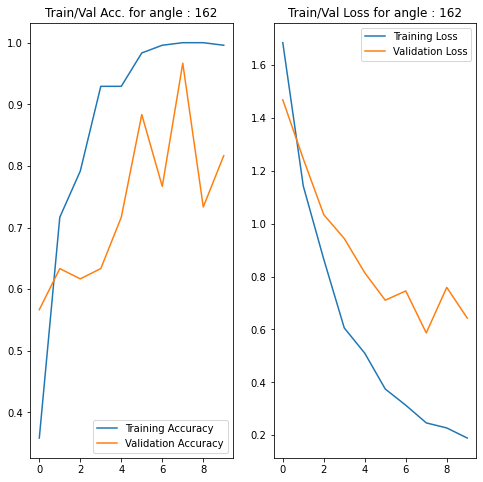

Epoch 1/10
30/30 [==============================] - 132s 4s/step - loss: 1.6630 - accuracy: 0.3369 - val_loss: 1.4911 - val_accuracy: 0.3833
Epoch 2/10
30/30 [==============================] - 3s 115ms/step - loss: 1.1098 - accuracy: 0.8268 - val_loss: 1.2527 - val_accuracy: 0.5167
Epoch 3/10
30/30 [==============================] - 4s 118ms/step - loss: 0.7916 - accuracy: 0.9045 - val_loss: 0.9303 - val_accuracy: 0.6667
Epoch 4/10
30/30 [==============================] - 3s 116ms/step - loss: 0.5111 - accuracy: 0.9971 - val_loss: 0.8336 - val_accuracy: 0.7167
Epoch 5/10
30/30 [==============================] - 3s 116ms/step - loss: 0.3736 - accuracy: 1.0000 - val_loss: 0.8421 - val_accuracy: 0.7500
Epoch 6/10
30/30 [==============================] - 3s 117ms/step - loss: 0.3206 - accuracy: 0.9978 - val_loss: 0.6808 - val_accuracy: 0.8000
Epoch 7/10
30/30 [==============================] - 3s 116ms/step - loss: 0.2582 - accuracy: 1.0000 - val_loss: 0.6860 - val_accuracy: 0.7167
Epoch 8

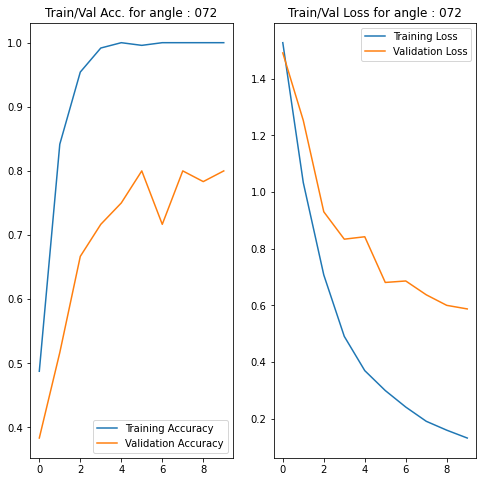

Epoch 1/10
30/30 [==============================] - 137s 5s/step - loss: 1.8866 - accuracy: 0.2293 - val_loss: 1.4793 - val_accuracy: 0.4333
Epoch 2/10
30/30 [==============================] - 3s 113ms/step - loss: 1.2660 - accuracy: 0.6726 - val_loss: 1.0998 - val_accuracy: 0.7000
Epoch 3/10
30/30 [==============================] - 3s 113ms/step - loss: 0.8893 - accuracy: 0.7816 - val_loss: 0.9218 - val_accuracy: 0.7000
Epoch 4/10
30/30 [==============================] - 3s 114ms/step - loss: 0.6787 - accuracy: 0.9197 - val_loss: 0.6758 - val_accuracy: 0.8833
Epoch 5/10
30/30 [==============================] - 3s 113ms/step - loss: 0.4999 - accuracy: 0.9684 - val_loss: 0.6349 - val_accuracy: 0.9000
Epoch 6/10
30/30 [==============================] - 3s 113ms/step - loss: 0.3877 - accuracy: 0.9809 - val_loss: 0.5988 - val_accuracy: 0.8333
Epoch 7/10
30/30 [==============================] - 3s 114ms/step - loss: 0.3262 - accuracy: 0.9731 - val_loss: 0.6012 - val_accuracy: 0.8167
Epoch 8

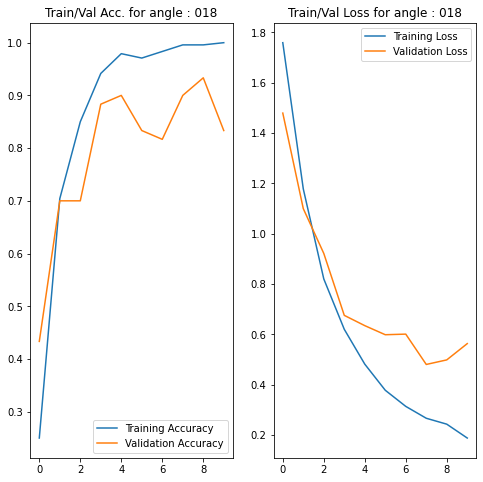

Epoch 1/10
30/30 [==============================] - 130s 4s/step - loss: 1.7674 - accuracy: 0.2305 - val_loss: 1.5497 - val_accuracy: 0.4333
Epoch 2/10
30/30 [==============================] - 3s 117ms/step - loss: 1.1831 - accuracy: 0.7654 - val_loss: 1.4246 - val_accuracy: 0.5667
Epoch 3/10
30/30 [==============================] - 3s 115ms/step - loss: 0.8364 - accuracy: 0.8621 - val_loss: 1.1697 - val_accuracy: 0.6500
Epoch 4/10
30/30 [==============================] - 3s 114ms/step - loss: 0.5712 - accuracy: 0.9842 - val_loss: 1.0971 - val_accuracy: 0.6333
Epoch 5/10
30/30 [==============================] - 3s 115ms/step - loss: 0.4100 - accuracy: 0.9928 - val_loss: 1.0031 - val_accuracy: 0.6833
Epoch 6/10
30/30 [==============================] - 3s 115ms/step - loss: 0.3469 - accuracy: 0.9996 - val_loss: 1.0247 - val_accuracy: 0.7167
Epoch 7/10
30/30 [==============================] - 3s 115ms/step - loss: 0.2837 - accuracy: 1.0000 - val_loss: 0.9784 - val_accuracy: 0.6833
Epoch 8

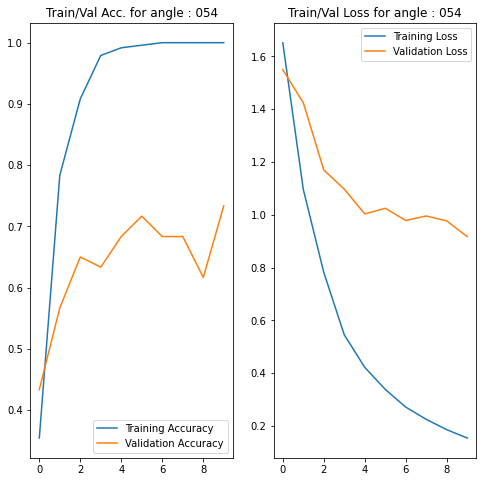

Epoch 1/10
30/30 [==============================] - 125s 4s/step - loss: 2.1297 - accuracy: 0.2273 - val_loss: 1.5199 - val_accuracy: 0.3500
Epoch 2/10
30/30 [==============================] - 3s 115ms/step - loss: 1.1025 - accuracy: 0.7246 - val_loss: 1.1992 - val_accuracy: 0.4833
Epoch 3/10
30/30 [==============================] - 3s 113ms/step - loss: 0.7160 - accuracy: 0.8924 - val_loss: 1.0561 - val_accuracy: 0.6500
Epoch 4/10
30/30 [==============================] - 3s 113ms/step - loss: 0.5031 - accuracy: 0.9307 - val_loss: 0.9405 - val_accuracy: 0.7833
Epoch 5/10
30/30 [==============================] - 3s 113ms/step - loss: 0.3552 - accuracy: 0.9723 - val_loss: 0.9358 - val_accuracy: 0.8167
Epoch 6/10
30/30 [==============================] - 3s 114ms/step - loss: 0.2851 - accuracy: 0.9816 - val_loss: 0.8608 - val_accuracy: 0.8333
Epoch 7/10
30/30 [==============================] - 3s 114ms/step - loss: 0.2327 - accuracy: 0.9976 - val_loss: 0.9207 - val_accuracy: 0.7500
Epoch 8

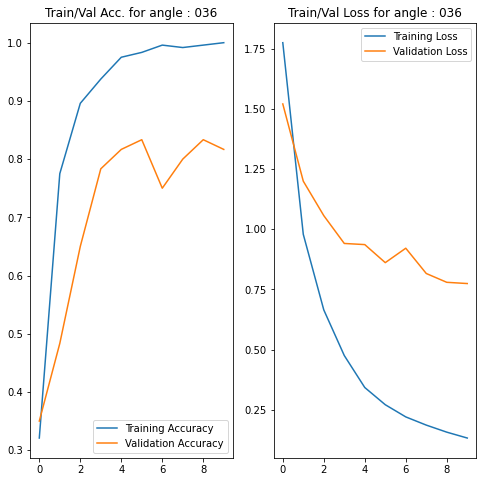

Epoch 1/10
30/30 [==============================] - 146s 5s/step - loss: 1.7763 - accuracy: 0.3542 - val_loss: 1.5368 - val_accuracy: 0.3833
Epoch 2/10
30/30 [==============================] - 4s 118ms/step - loss: 1.1331 - accuracy: 0.7744 - val_loss: 1.1976 - val_accuracy: 0.5333
Epoch 3/10
30/30 [==============================] - 3s 117ms/step - loss: 0.6842 - accuracy: 0.9384 - val_loss: 1.0026 - val_accuracy: 0.6167
Epoch 4/10
30/30 [==============================] - 4s 117ms/step - loss: 0.5369 - accuracy: 0.9753 - val_loss: 0.8503 - val_accuracy: 0.6500
Epoch 5/10
30/30 [==============================] - 3s 116ms/step - loss: 0.3450 - accuracy: 0.9963 - val_loss: 0.8327 - val_accuracy: 0.6833
Epoch 6/10
30/30 [==============================] - 3s 113ms/step - loss: 0.2832 - accuracy: 1.0000 - val_loss: 0.7426 - val_accuracy: 0.7000
Epoch 7/10
30/30 [==============================] - 3s 114ms/step - loss: 0.2282 - accuracy: 1.0000 - val_loss: 0.7534 - val_accuracy: 0.6667
Epoch 8

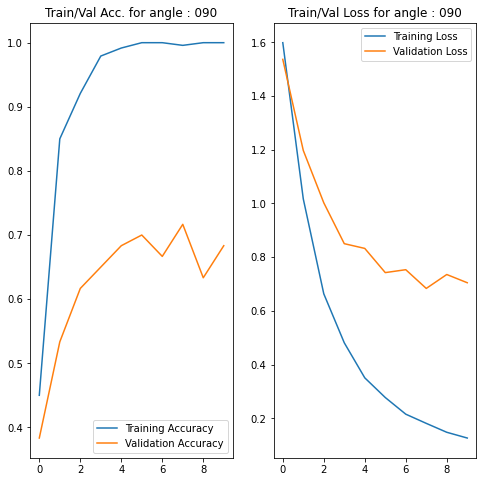

Epoch 1/10
30/30 [==============================] - 137s 5s/step - loss: 1.8974 - accuracy: 0.2149 - val_loss: 1.6267 - val_accuracy: 0.2500
Epoch 2/10
30/30 [==============================] - 3s 112ms/step - loss: 1.1769 - accuracy: 0.7965 - val_loss: 1.3513 - val_accuracy: 0.4333
Epoch 3/10
30/30 [==============================] - 3s 112ms/step - loss: 0.7962 - accuracy: 0.8810 - val_loss: 1.0767 - val_accuracy: 0.6500
Epoch 4/10
30/30 [==============================] - 3s 112ms/step - loss: 0.5636 - accuracy: 0.9658 - val_loss: 0.9593 - val_accuracy: 0.6667
Epoch 5/10
30/30 [==============================] - 3s 112ms/step - loss: 0.4197 - accuracy: 0.9877 - val_loss: 0.8721 - val_accuracy: 0.6833
Epoch 6/10
30/30 [==============================] - 3s 112ms/step - loss: 0.3258 - accuracy: 1.0000 - val_loss: 0.8618 - val_accuracy: 0.7667
Epoch 7/10
30/30 [==============================] - 3s 114ms/step - loss: 0.2413 - accuracy: 0.9952 - val_loss: 0.8258 - val_accuracy: 0.7333
Epoch 8

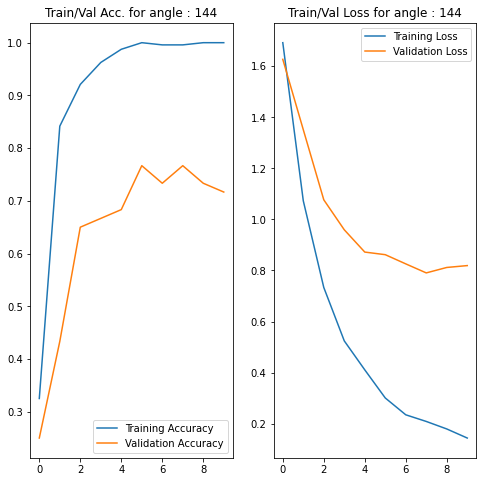

Epoch 1/10
30/30 [==============================] - 126s 4s/step - loss: 1.7332 - accuracy: 0.3076 - val_loss: 1.2237 - val_accuracy: 0.5833
Epoch 2/10
30/30 [==============================] - 3s 112ms/step - loss: 1.0607 - accuracy: 0.7038 - val_loss: 0.7932 - val_accuracy: 0.8833
Epoch 3/10
30/30 [==============================] - 3s 113ms/step - loss: 0.7265 - accuracy: 0.8824 - val_loss: 0.5521 - val_accuracy: 0.9833
Epoch 4/10
30/30 [==============================] - 3s 112ms/step - loss: 0.5278 - accuracy: 0.9246 - val_loss: 0.4360 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 3s 112ms/step - loss: 0.3524 - accuracy: 0.9885 - val_loss: 0.4167 - val_accuracy: 0.9833
Epoch 6/10
30/30 [==============================] - 3s 113ms/step - loss: 0.3166 - accuracy: 0.9837 - val_loss: 0.3707 - val_accuracy: 0.9667
Epoch 7/10
30/30 [==============================] - 3s 112ms/step - loss: 0.2467 - accuracy: 0.9704 - val_loss: 0.3051 - val_accuracy: 0.9833
Epoch 8

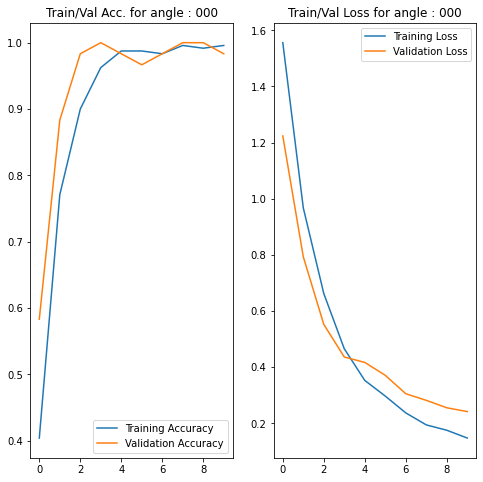

Epoch 1/10
30/30 [==============================] - 154s 5s/step - loss: 1.8289 - accuracy: 0.2500 - val_loss: 1.3556 - val_accuracy: 0.6833
Epoch 2/10
30/30 [==============================] - 3s 112ms/step - loss: 1.0960 - accuracy: 0.8573 - val_loss: 1.0906 - val_accuracy: 0.6833
Epoch 3/10
30/30 [==============================] - 3s 113ms/step - loss: 0.7079 - accuracy: 0.9291 - val_loss: 0.9101 - val_accuracy: 0.7667
Epoch 4/10
30/30 [==============================] - 3s 115ms/step - loss: 0.4891 - accuracy: 0.9718 - val_loss: 0.7662 - val_accuracy: 0.8667
Epoch 5/10
30/30 [==============================] - 3s 113ms/step - loss: 0.3740 - accuracy: 0.9971 - val_loss: 0.7107 - val_accuracy: 0.8167
Epoch 6/10
30/30 [==============================] - 3s 116ms/step - loss: 0.3165 - accuracy: 0.9699 - val_loss: 0.6542 - val_accuracy: 0.8000
Epoch 7/10
30/30 [==============================] - 3s 117ms/step - loss: 0.2686 - accuracy: 1.0000 - val_loss: 0.6259 - val_accuracy: 0.7667
Epoch 8

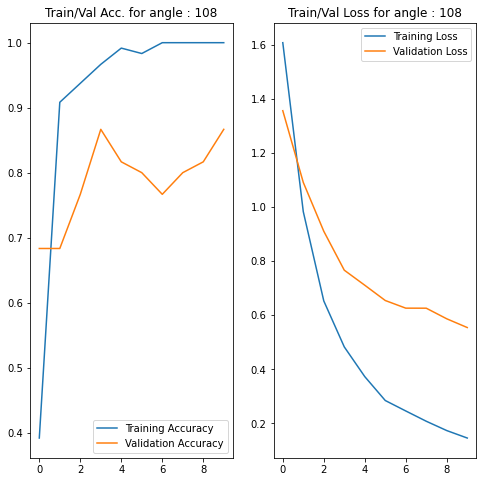

Epoch 1/10
30/30 [==============================] - 130s 4s/step - loss: 1.7774 - accuracy: 0.3069 - val_loss: 1.2169 - val_accuracy: 0.7000
Epoch 2/10
30/30 [==============================] - 3s 113ms/step - loss: 1.0051 - accuracy: 0.8317 - val_loss: 0.8890 - val_accuracy: 0.7667
Epoch 3/10
30/30 [==============================] - 3s 114ms/step - loss: 0.6128 - accuracy: 0.9138 - val_loss: 0.7698 - val_accuracy: 0.7667
Epoch 4/10
30/30 [==============================] - 3s 114ms/step - loss: 0.4579 - accuracy: 0.9437 - val_loss: 0.5401 - val_accuracy: 0.9500
Epoch 5/10
30/30 [==============================] - 3s 113ms/step - loss: 0.2960 - accuracy: 0.9732 - val_loss: 0.5268 - val_accuracy: 0.8833
Epoch 6/10
30/30 [==============================] - 3s 111ms/step - loss: 0.2451 - accuracy: 0.9978 - val_loss: 0.5533 - val_accuracy: 0.8333
Epoch 7/10
30/30 [==============================] - 3s 113ms/step - loss: 0.1746 - accuracy: 0.9854 - val_loss: 0.4184 - val_accuracy: 0.9000
Epoch 8

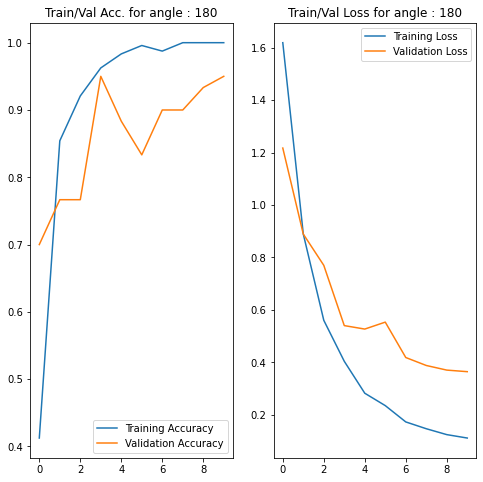

In [39]:
for angle in angles:
  model1=tf.keras.applications.MobileNet(
    include_top=False, weights='imagenet', 
     pooling='avg')
  model1.trainable = False
  
  model = keras.Sequential([model1,layers.Dense(6,activation='softmax')])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  history=model.fit(train_gen[angle],validation_data=val_gen[angle],epochs=10,callbacks=[c1,c2])

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(10)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy ')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Train/Val Acc. for angle : {}'.format(angle))

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Train/Val Loss for angle : {}'.format(angle))
  plt.show()